In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
import emcee
import sys
from astropy.table import Table
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import corner

default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'] # get default colors

In [3]:
# read in list of simulation cosmo parameters
table = Table.read('cosmological_parameters.txt', format='ascii')
params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])

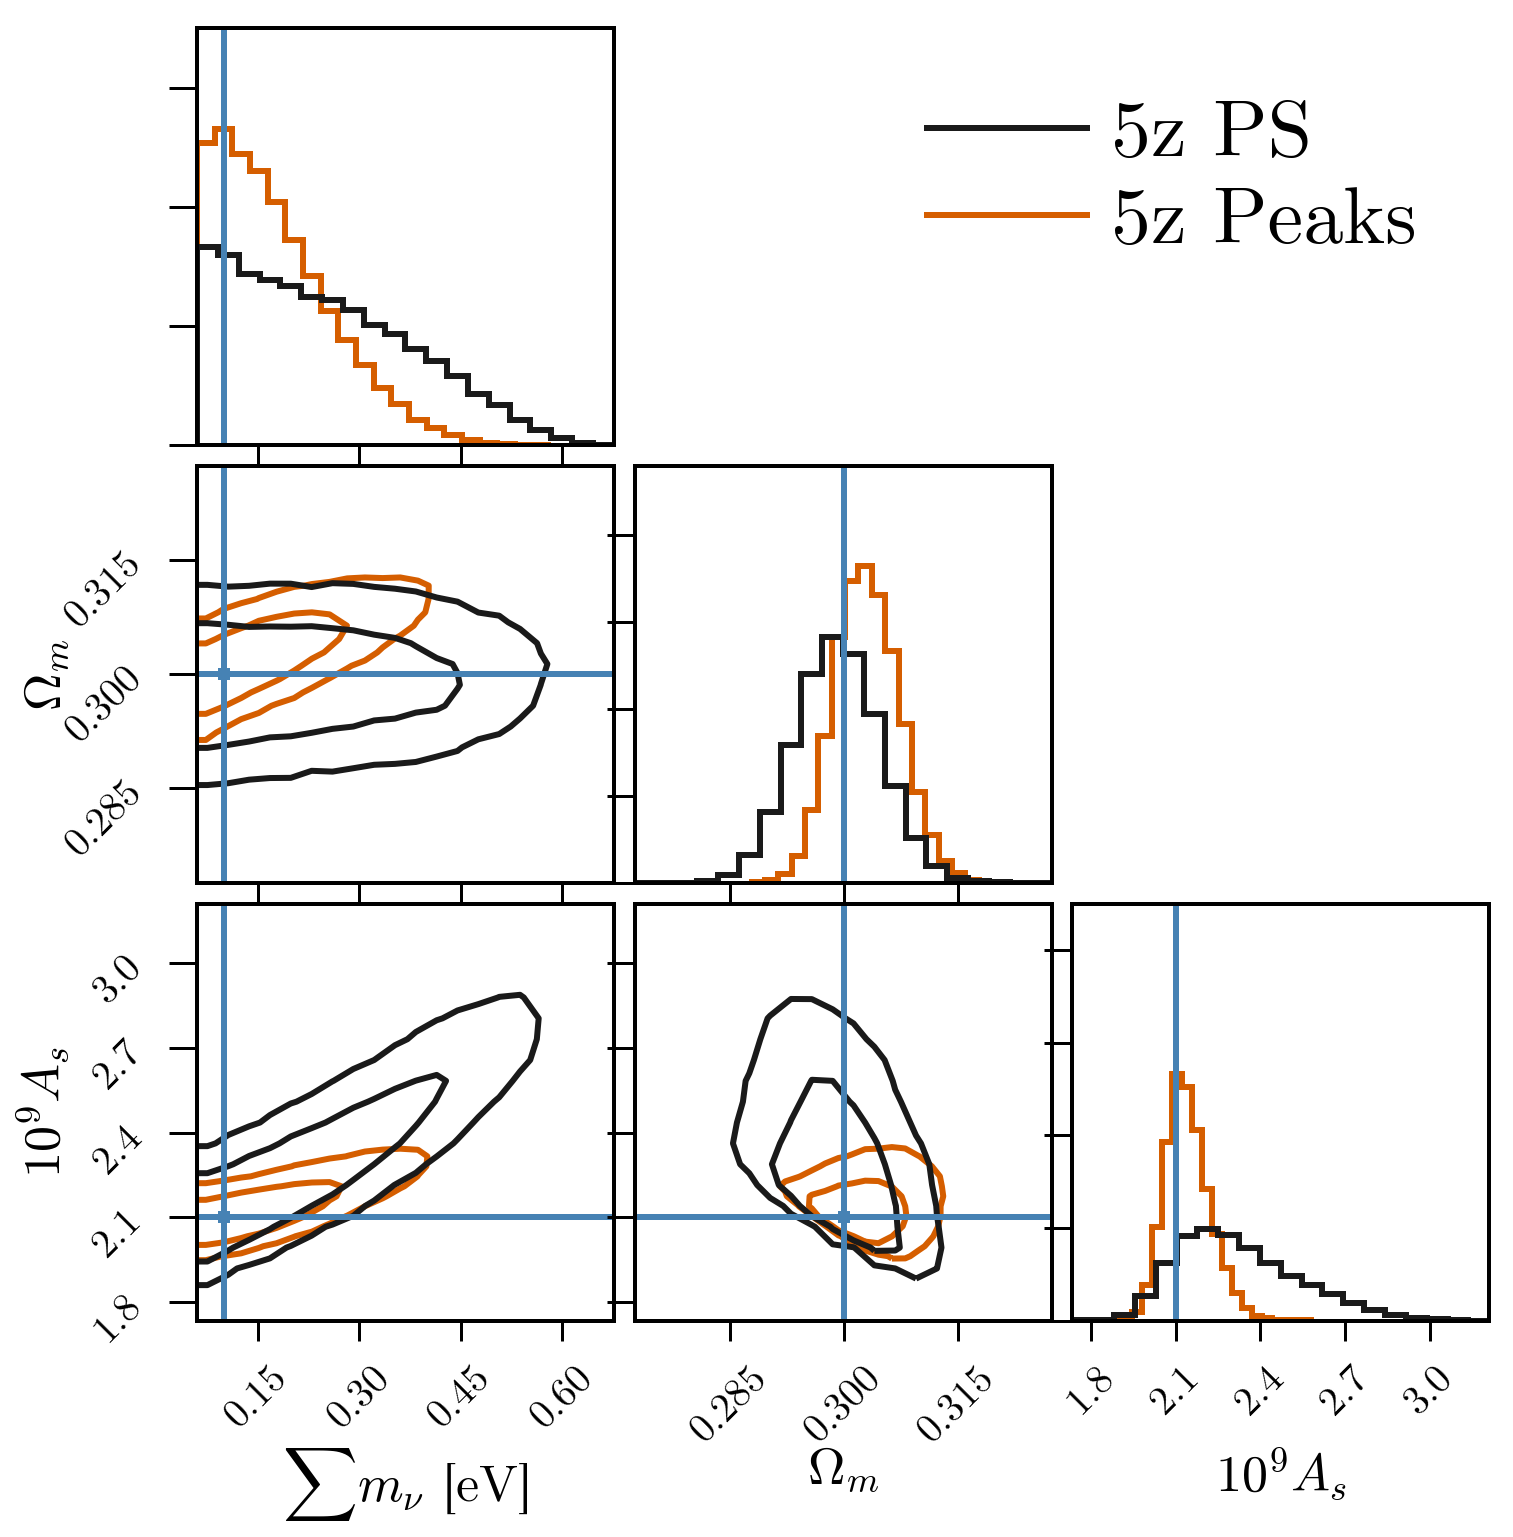

In [16]:
fig, axes = plt.subplots(3,3, figsize=(11,11))


chain = ascii.read("chains/5z_Peaks_943518.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/5z_PS_943519.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])

axes[0,2].plot([],[],color=default_color_list[0], label='5z PS')
axes[0,2].plot([],[],color=default_color_list[3], label='5z Peaks')
axes[0,2].legend(fontsize=40)

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# axes[2,0].set_xlabel(r'$\sum m_{\nu}$ (eV)', labelpad=50)
# axes[2,2].set_xlabel(r'$10^9 A_s$', labelpad=50)

# axes[1,0].set_ylabel(r'$\Omega_m$', labelpad=80)
# axes[2,0].set_ylabel(r'$10^9 A_s$', labelpad=50)

fig.savefig('figures/5z_PS_peaks_compare.pdf')

# Noiseless PS

(0, 9)

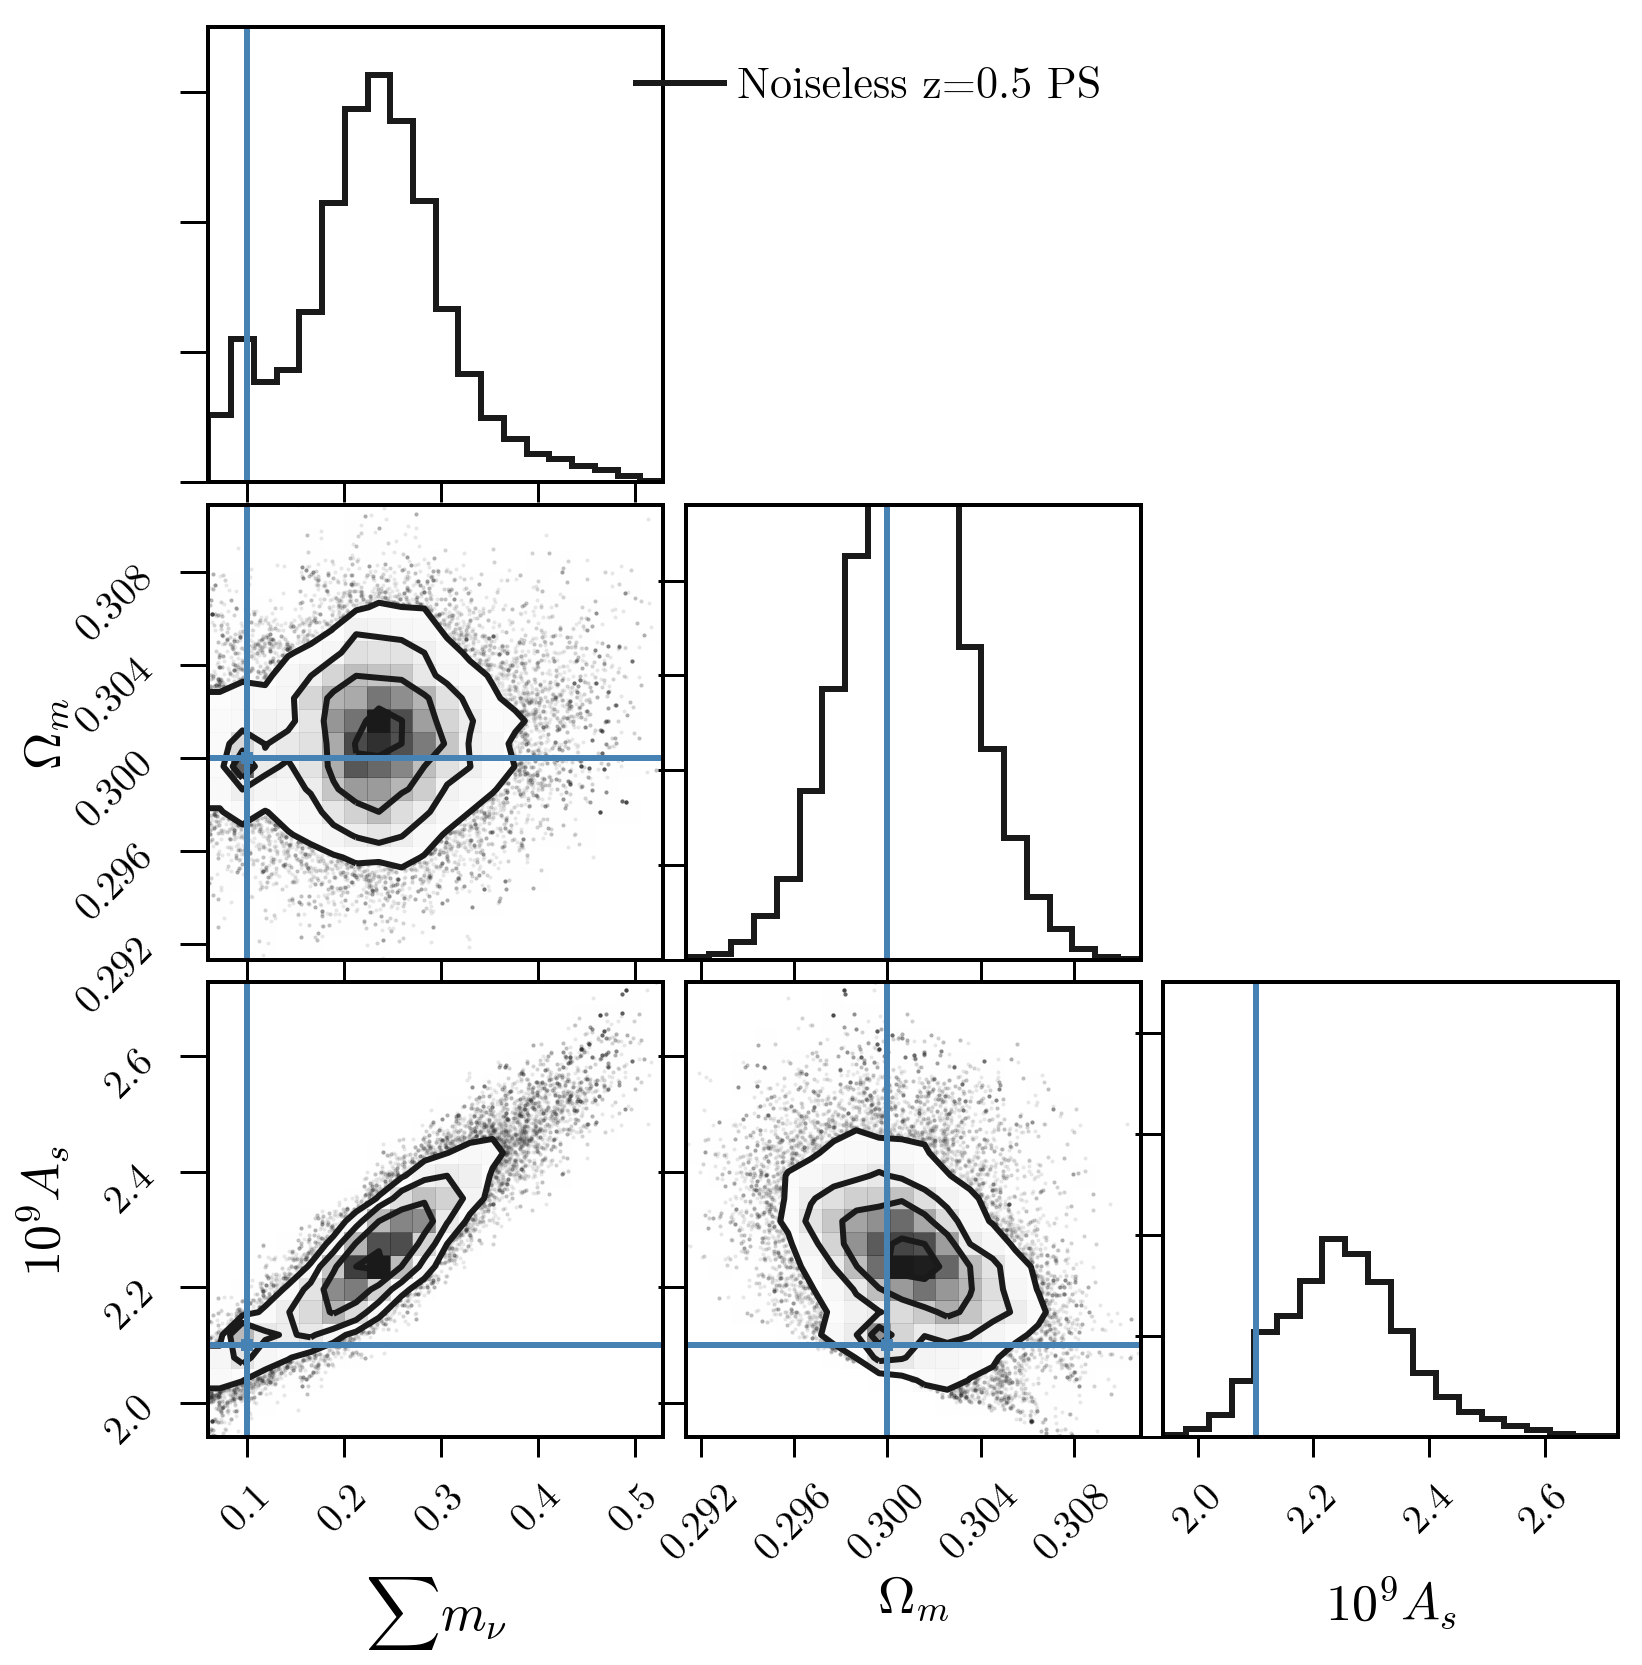

In [49]:
fig, axes = plt.subplots(3,3, figsize=(12,12))


# chain = ascii.read("chains/5z_Peaks_noiseless_943512.dat")[1200:]
# samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
# fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
#                     labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
#                     truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
#                     color=default_color_list[3])

chain = ascii.read("chains/old/5z_PS_noiseless_1z_941750.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=True, plot_density=True, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig,
                    color=default_color_list[0])

axes[0,1].plot([],[],color=default_color_list[0], label='Noiseless z=0.5 PS')
# axes[0,1].plot([],[],color=default_color_list[3], label='Noiseless Peaks')
axes[0,1].legend()

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# Comparison of ngal40 and 5z

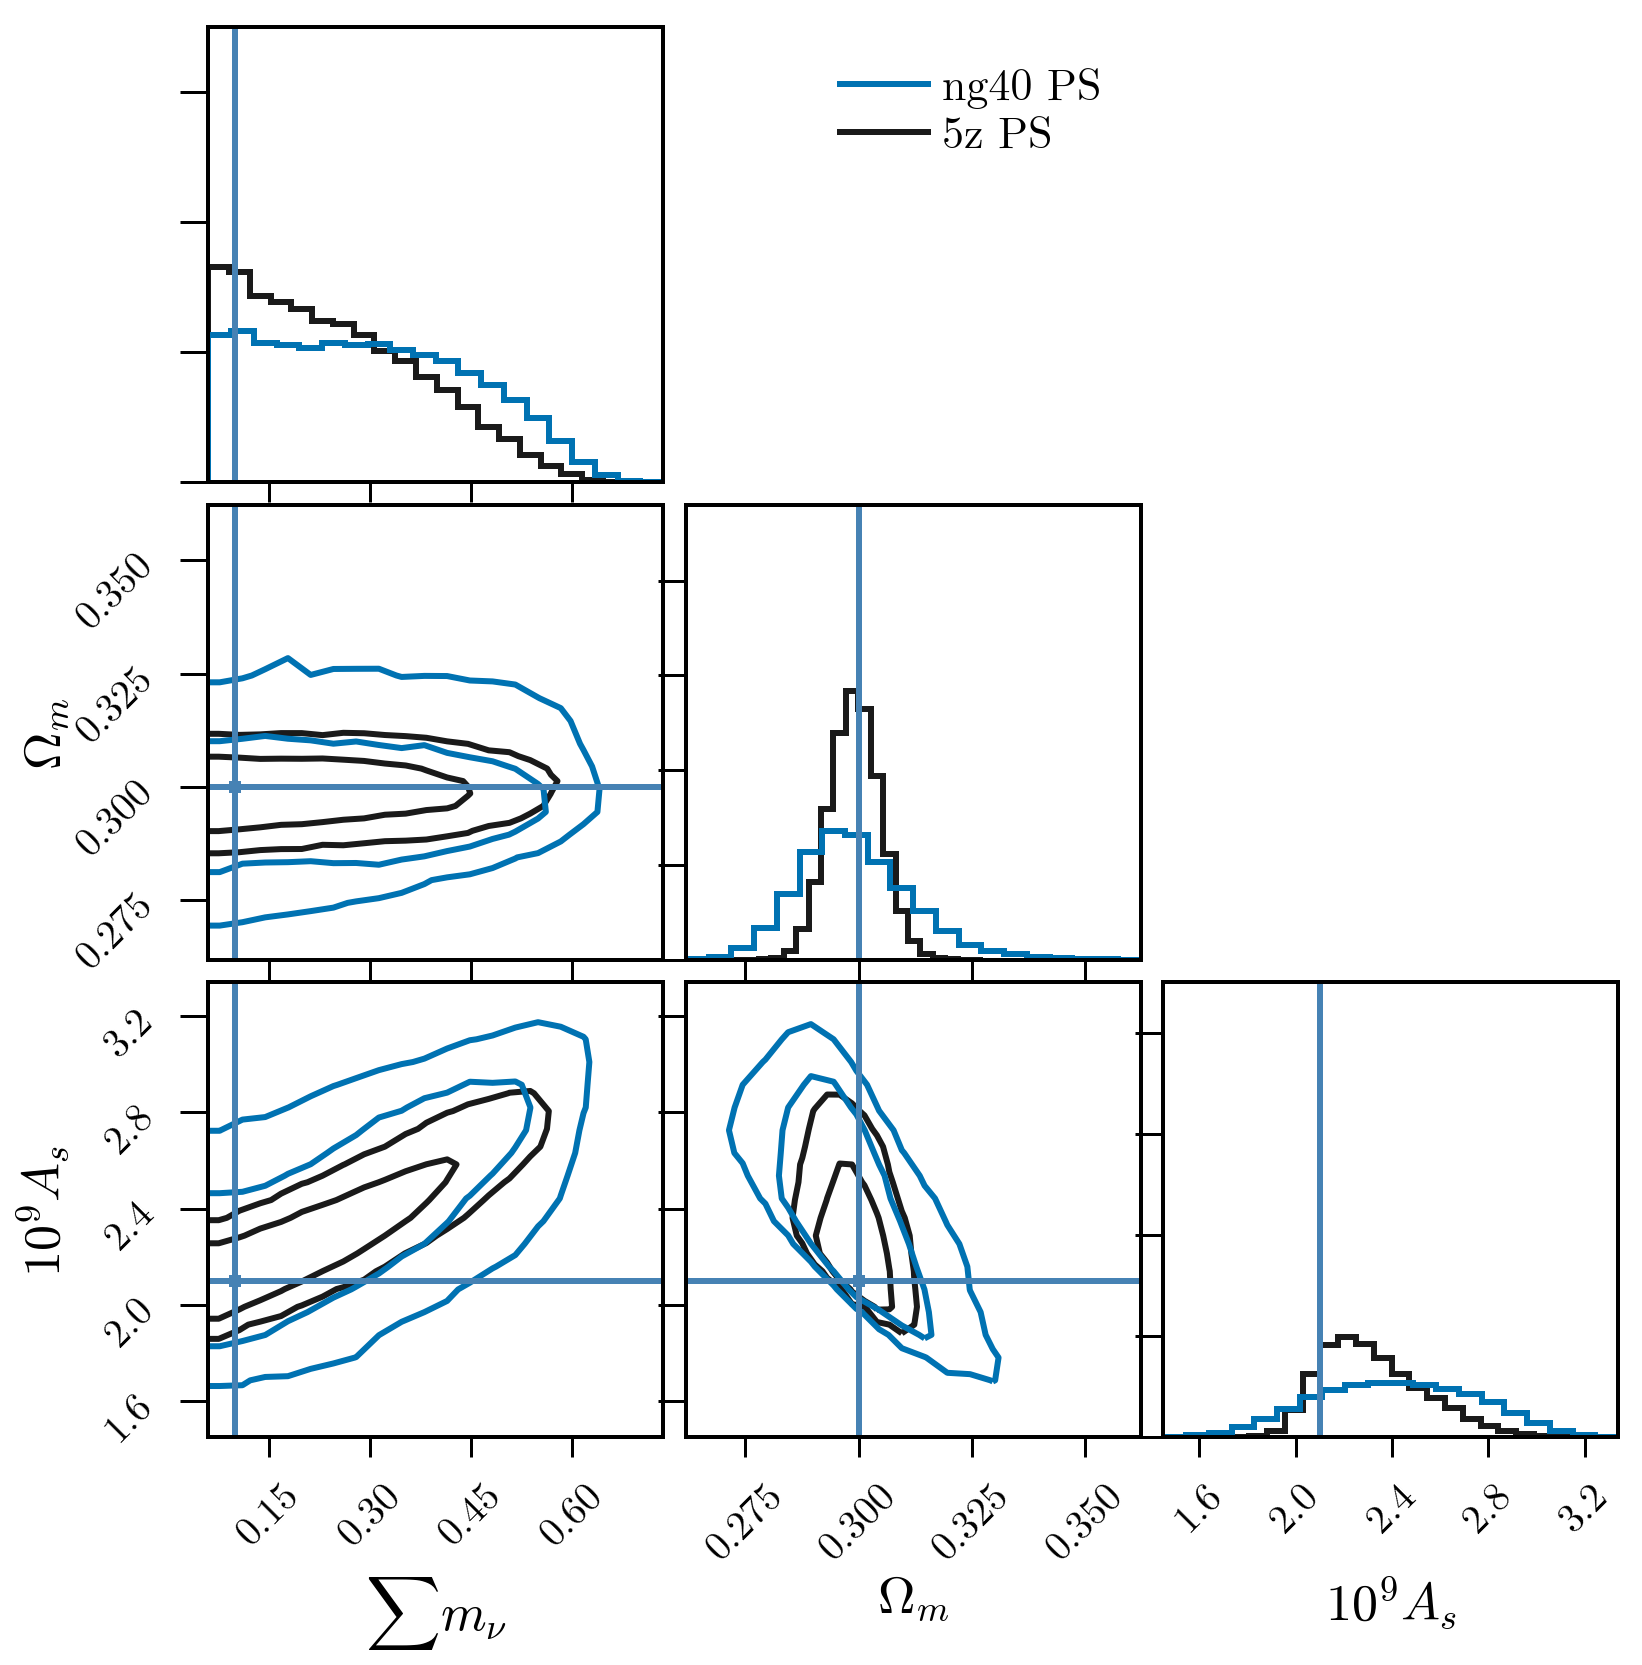

In [13]:
fig, axes = plt.subplots(3,3, figsize=(12,12))


chain = ascii.read("chains/5z_PS_943519.dat")[500:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[0])

chain = ascii.read("chains/ng40_PS_943517.dat")[500:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[1])

axes[0,1].plot([],[],color=default_color_list[1], label='ng40 PS')
axes[0,1].plot([],[],color=default_color_list[0], label='5z PS')
axes[0,1].legend()

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

fig.savefig('figures/PS_tomography.pdf')

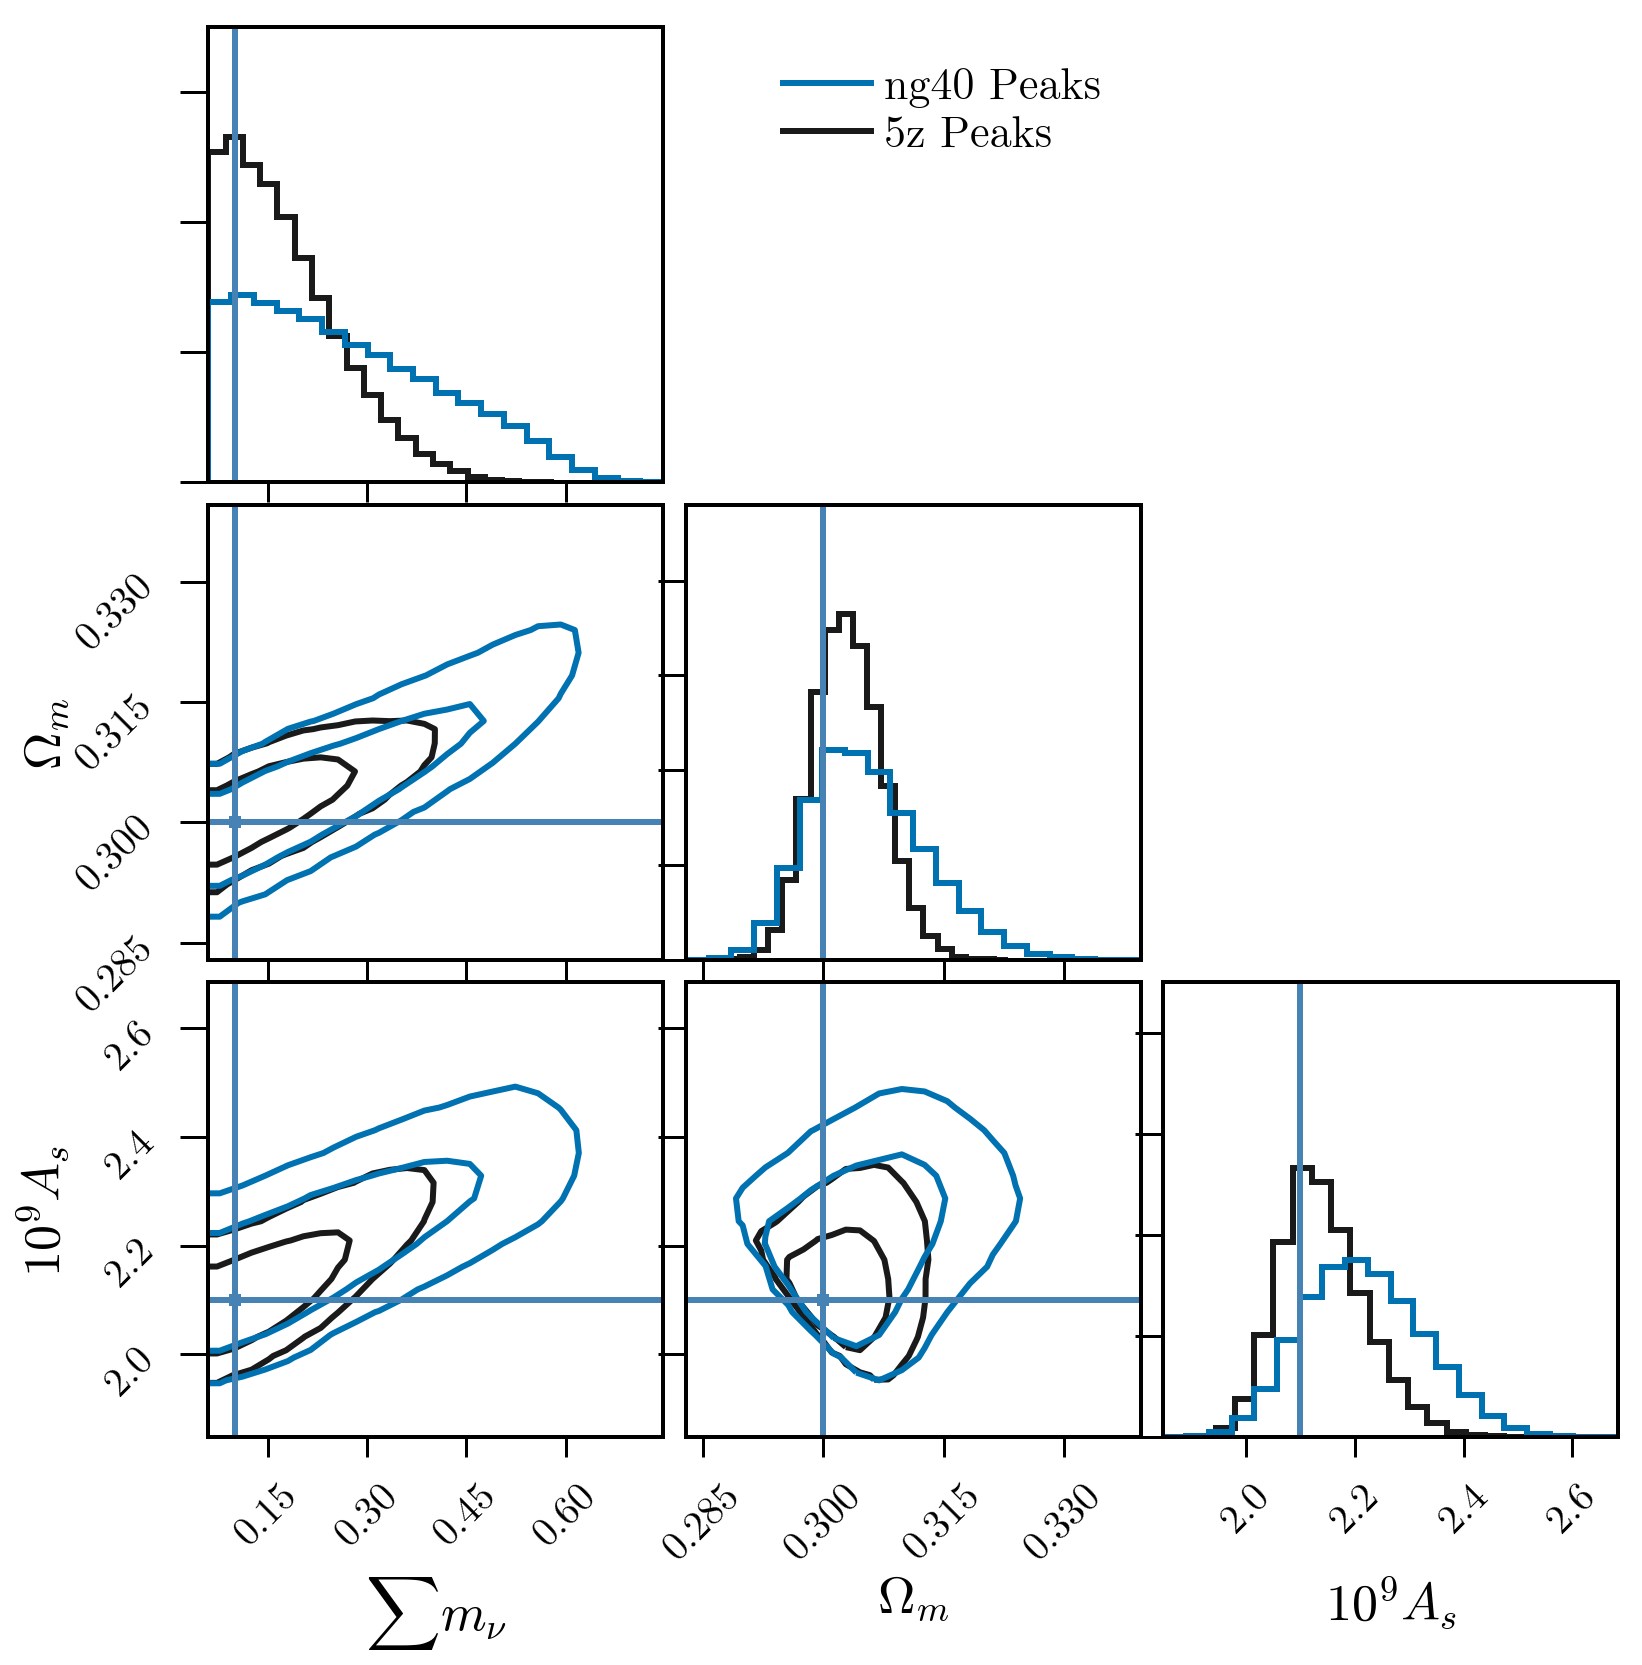

In [12]:
fig, axes = plt.subplots(3,3, figsize=(12,12))

chain = ascii.read("chains/5z_Peaks_943518.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[0])

chain = ascii.read("chains/ng40_Peaks_943514.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[1])

axes[0,1].plot([],[],color=default_color_list[1], label='ng40 Peaks')
axes[0,1].plot([],[],color=default_color_list[0], label='5z Peaks')
axes[0,1].legend()

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

fig.savefig('figures/Peaks_tomography.pdf')

# Stability Under Realizations

(0, 9)

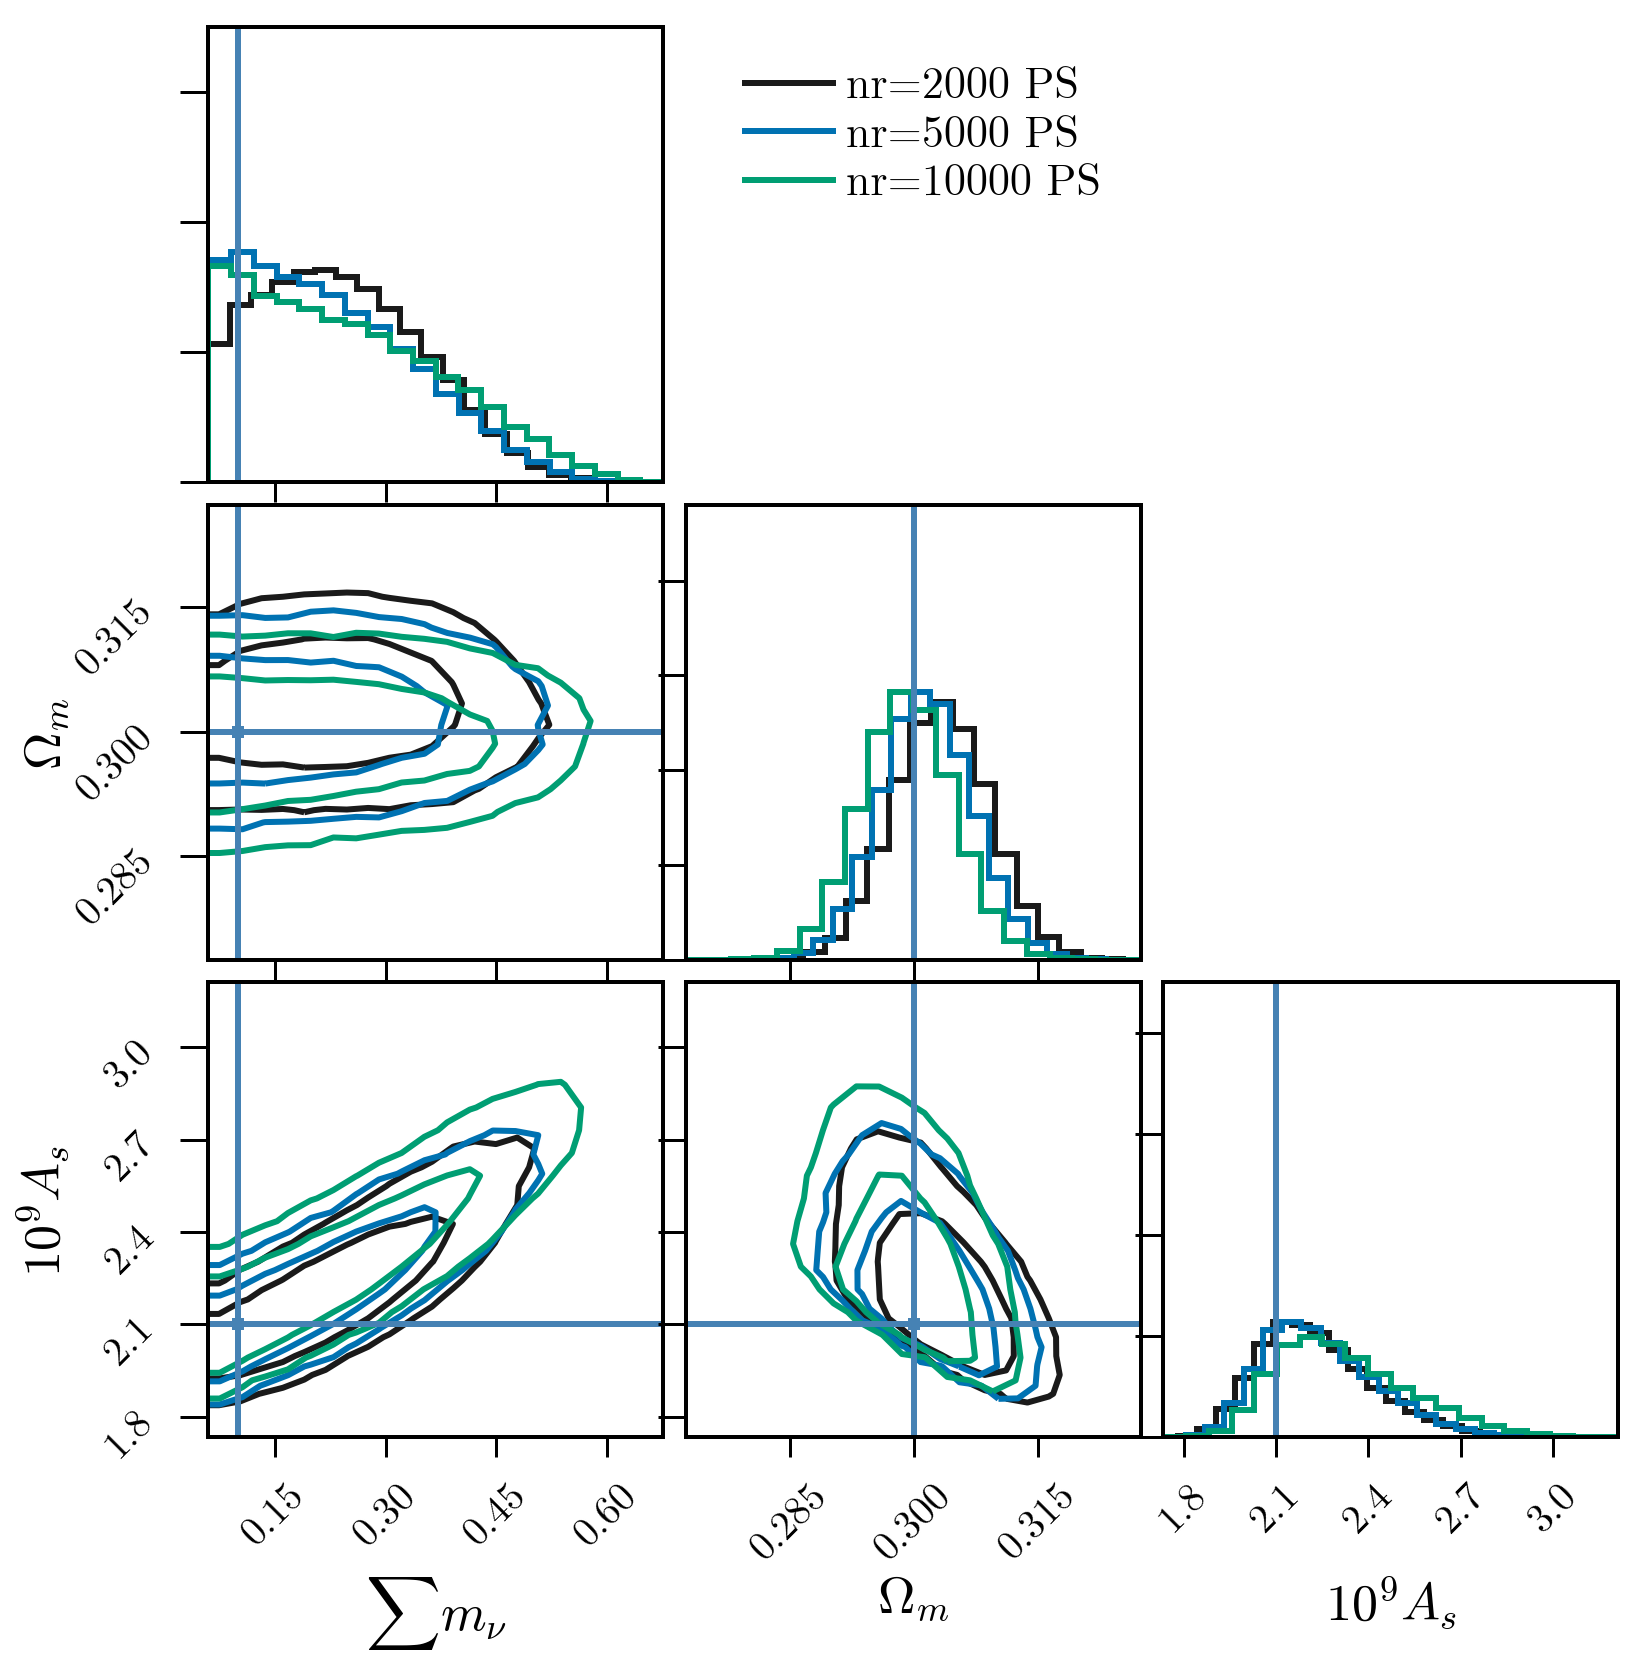

In [51]:
fig, axes = plt.subplots(3,3, figsize=(12,12))

chain = ascii.read("chains/5z_PS_947094.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[0])

chain = ascii.read("chains/5z_PS_947095.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[1])

chain = ascii.read("chains/5z_PS_943519.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[2])


axes[0,1].plot([],[],color=default_color_list[0], label='nr=2000 PS')
axes[0,1].plot([],[],color=default_color_list[1], label='nr=5000 PS')
axes[0,1].plot([],[],color=default_color_list[2], label='nr=10000 PS')
axes[0,1].legend()

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

(0, 9)

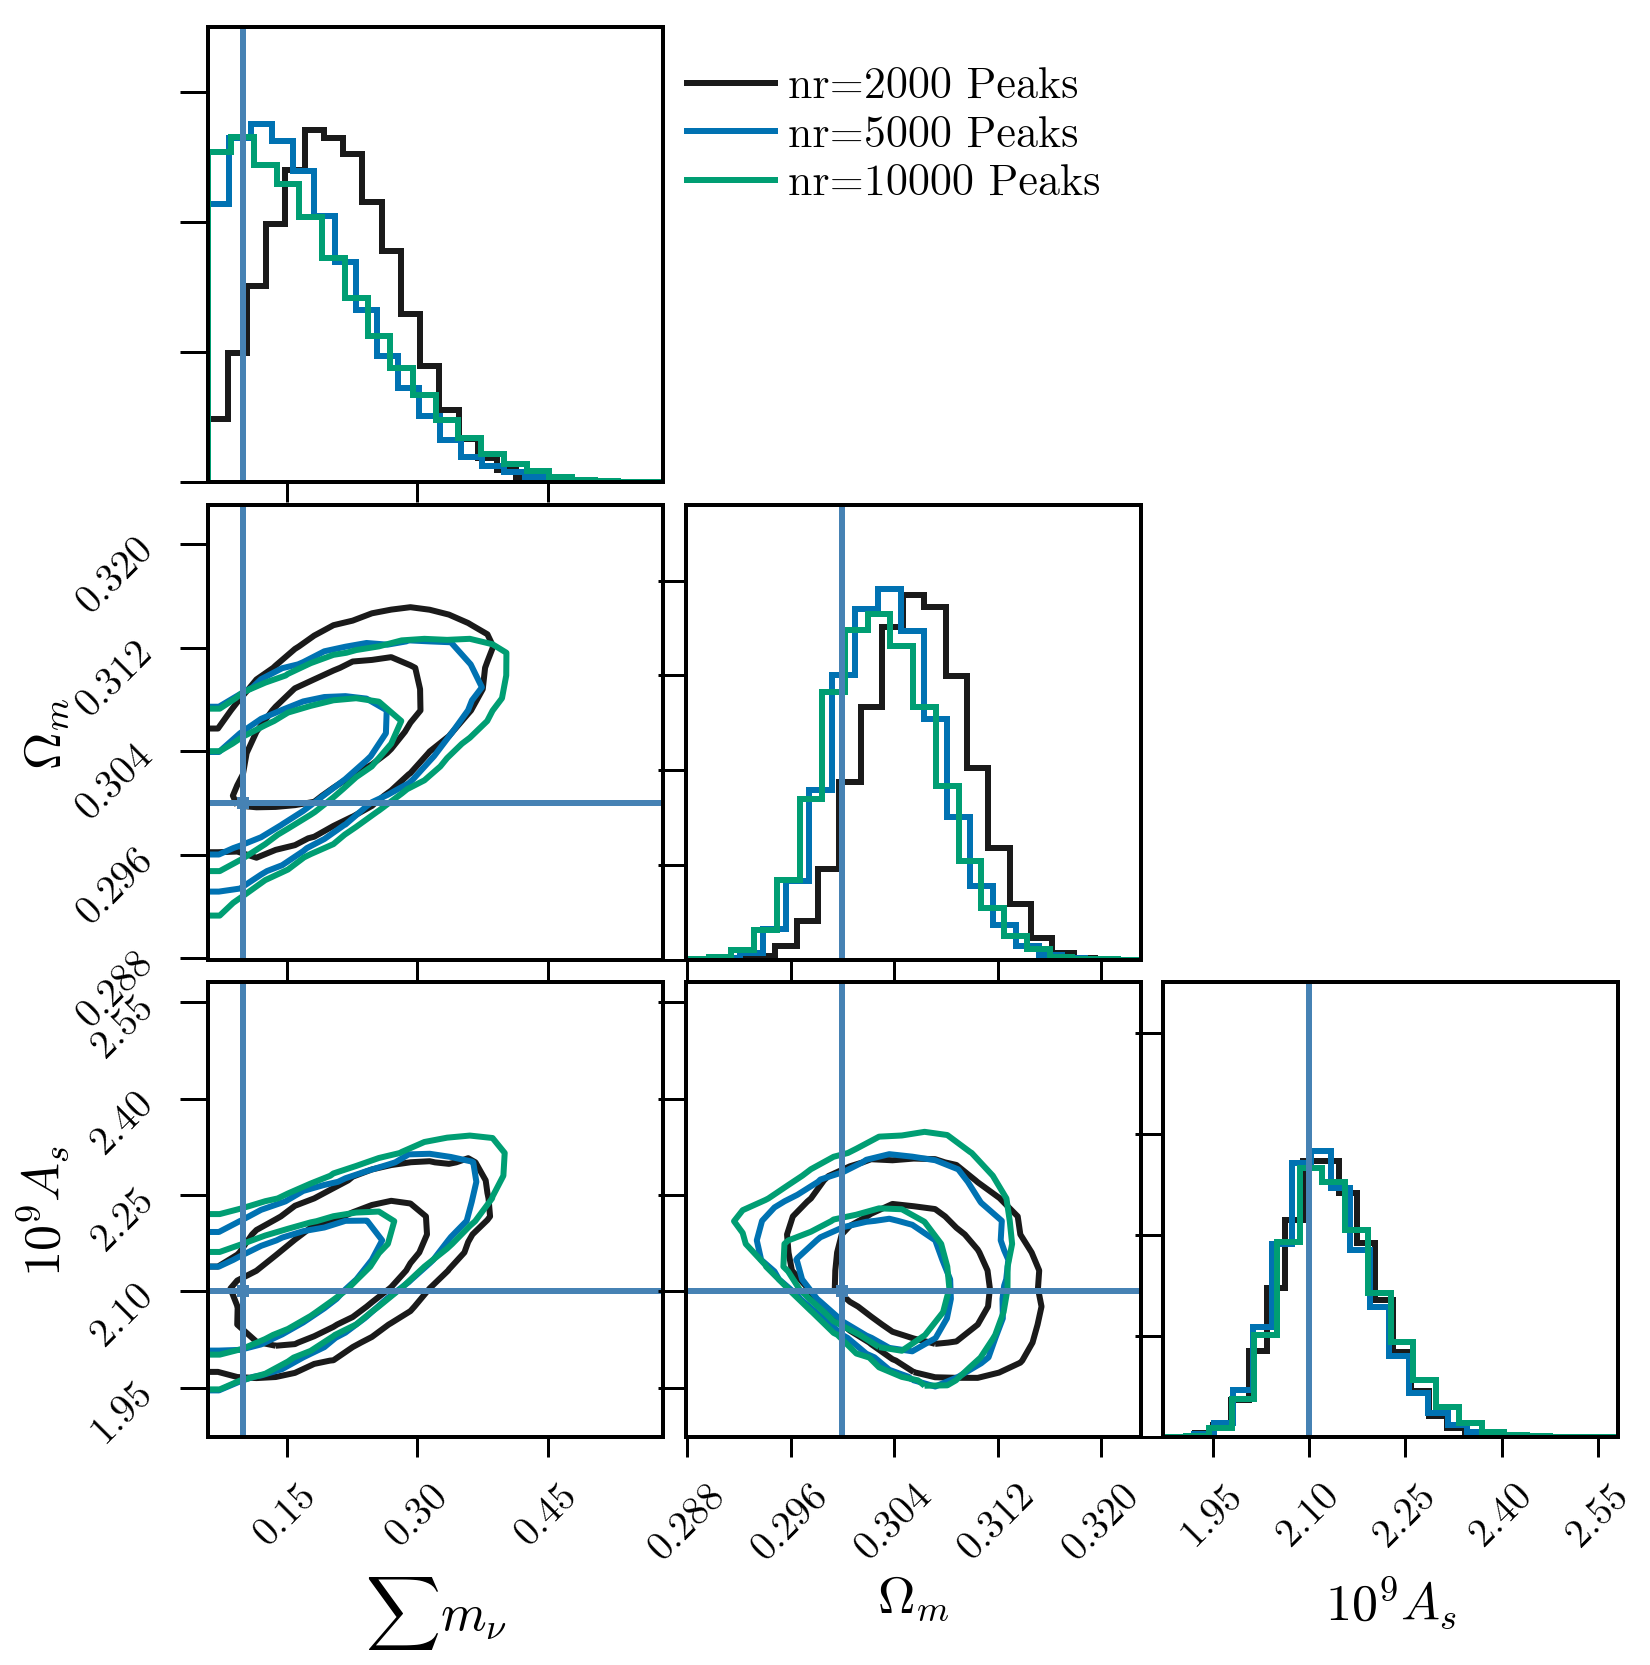

In [53]:
fig, axes = plt.subplots(3,3, figsize=(12,12))

chain = ascii.read("chains/5z_Peaks_947092.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[0])

chain = ascii.read("chains/5z_Peaks_947093.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[1])

chain = ascii.read("chains/5z_Peaks_943518.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[2])


axes[0,1].plot([],[],color=default_color_list[0], label='nr=2000 Peaks')
axes[0,1].plot([],[],color=default_color_list[1], label='nr=5000 Peaks')
axes[0,1].plot([],[],color=default_color_list[2], label='nr=10000 Peaks')
axes[0,1].legend()

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# PS ell

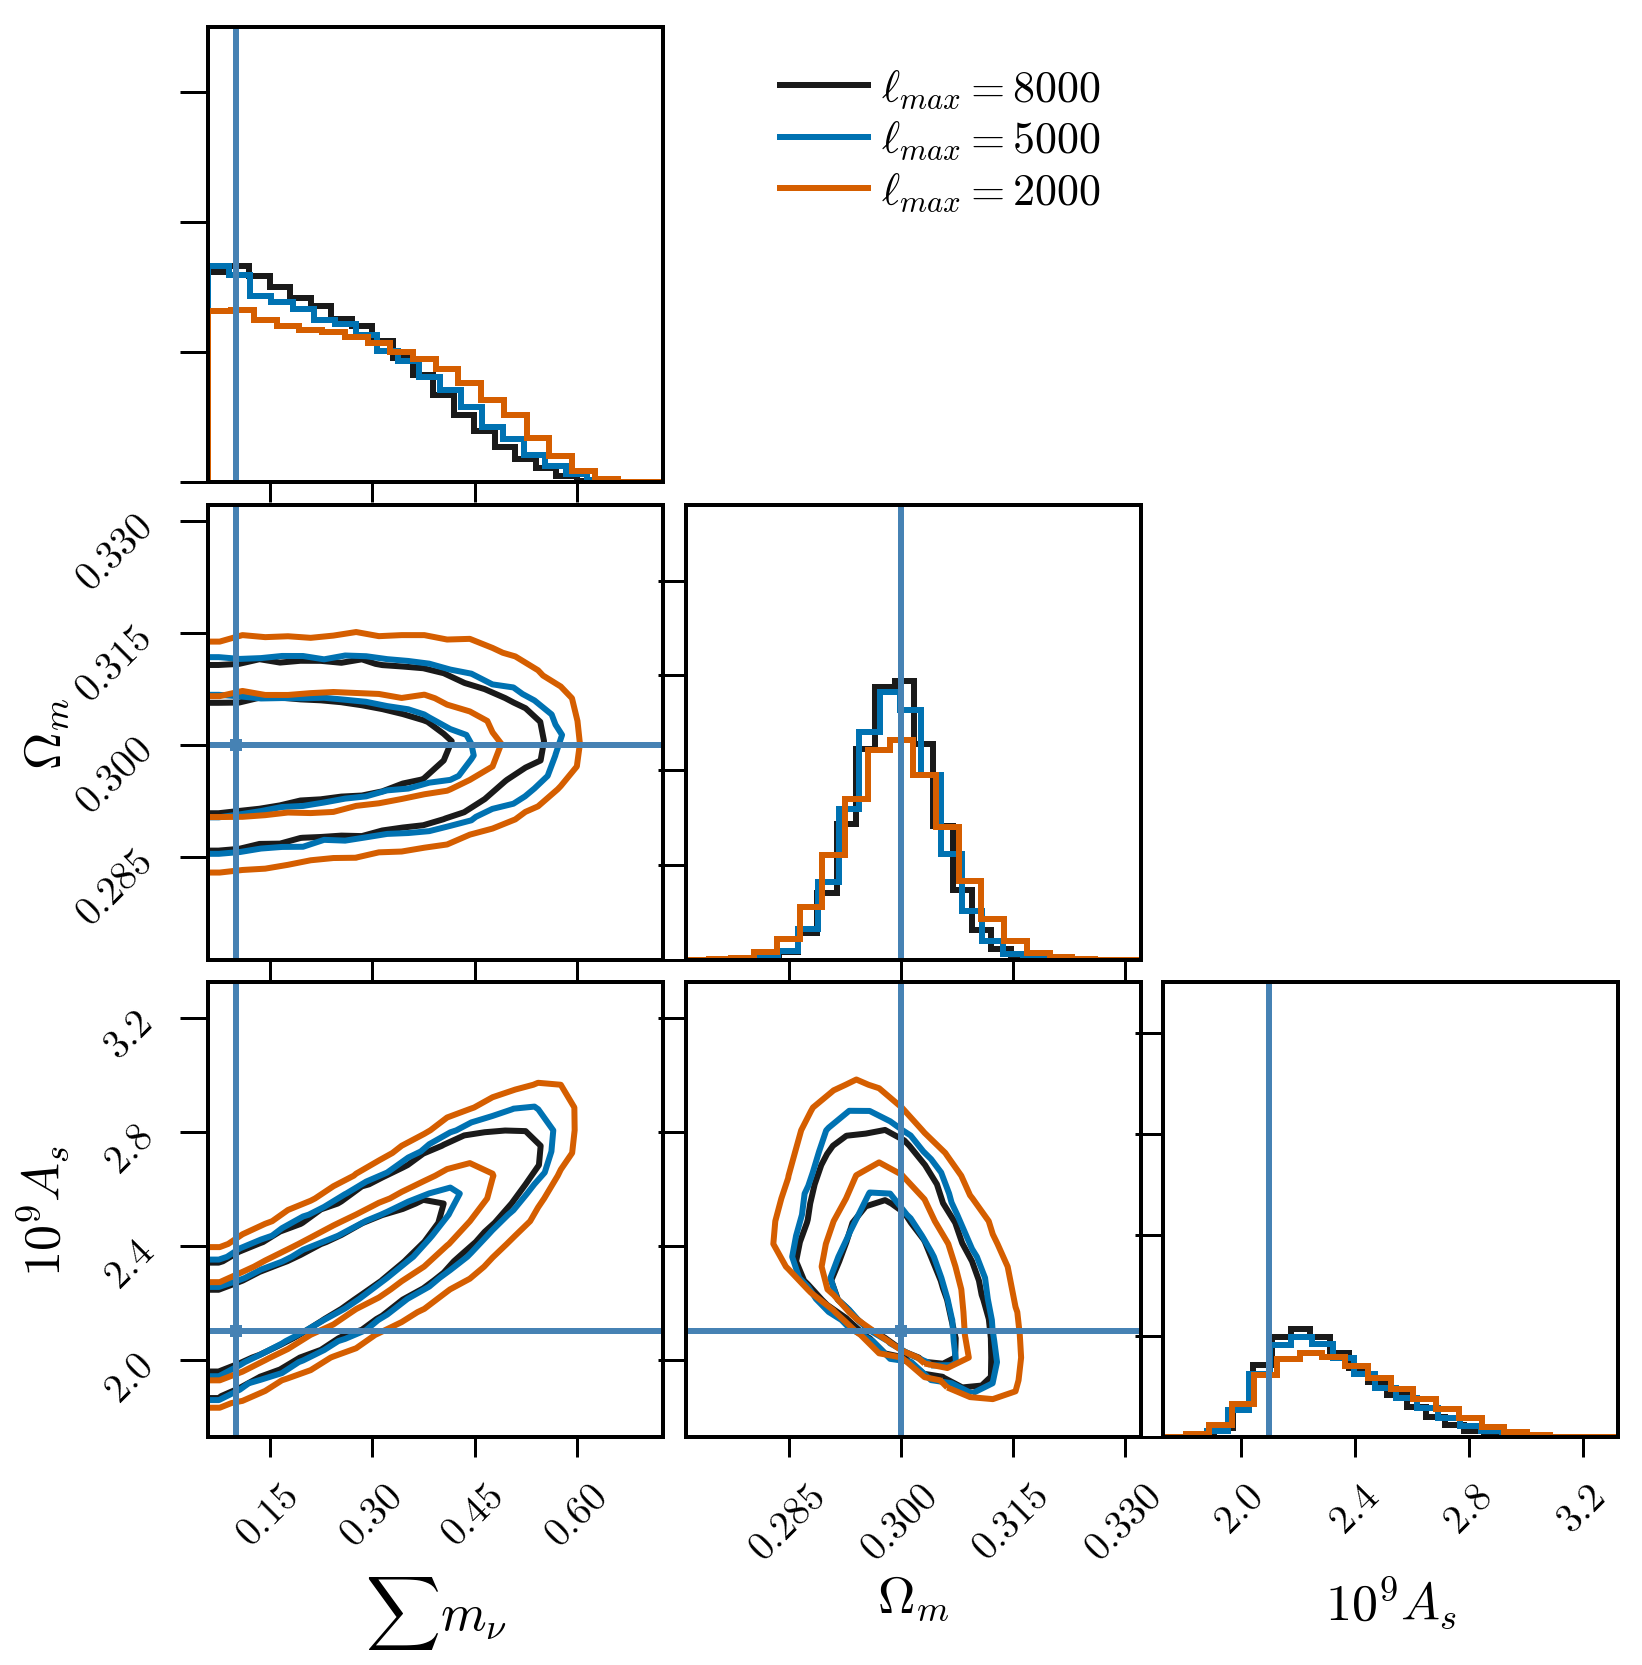

In [10]:
fig, axes = plt.subplots(3,3, figsize=(12,12))

chain = ascii.read("chains/5z_PS_8000_1060697.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[0])

chain = ascii.read("chains/5z_PS_943519.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])

chain = ascii.read("chains/5z_PS_2000_1060696.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[3])

axes[0,1].plot([],[],color=default_color_list[0], label=r'$\ell_{max}=8000$')
axes[0,1].plot([],[],color=default_color_list[1], label=r'$\ell_{max}=5000$')
axes[0,1].plot([],[],color=default_color_list[3], label=r'$\ell_{max}=2000$')
axes[0,1].legend()

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

fig.savefig('figures/PS_ell_comparison.pdf')

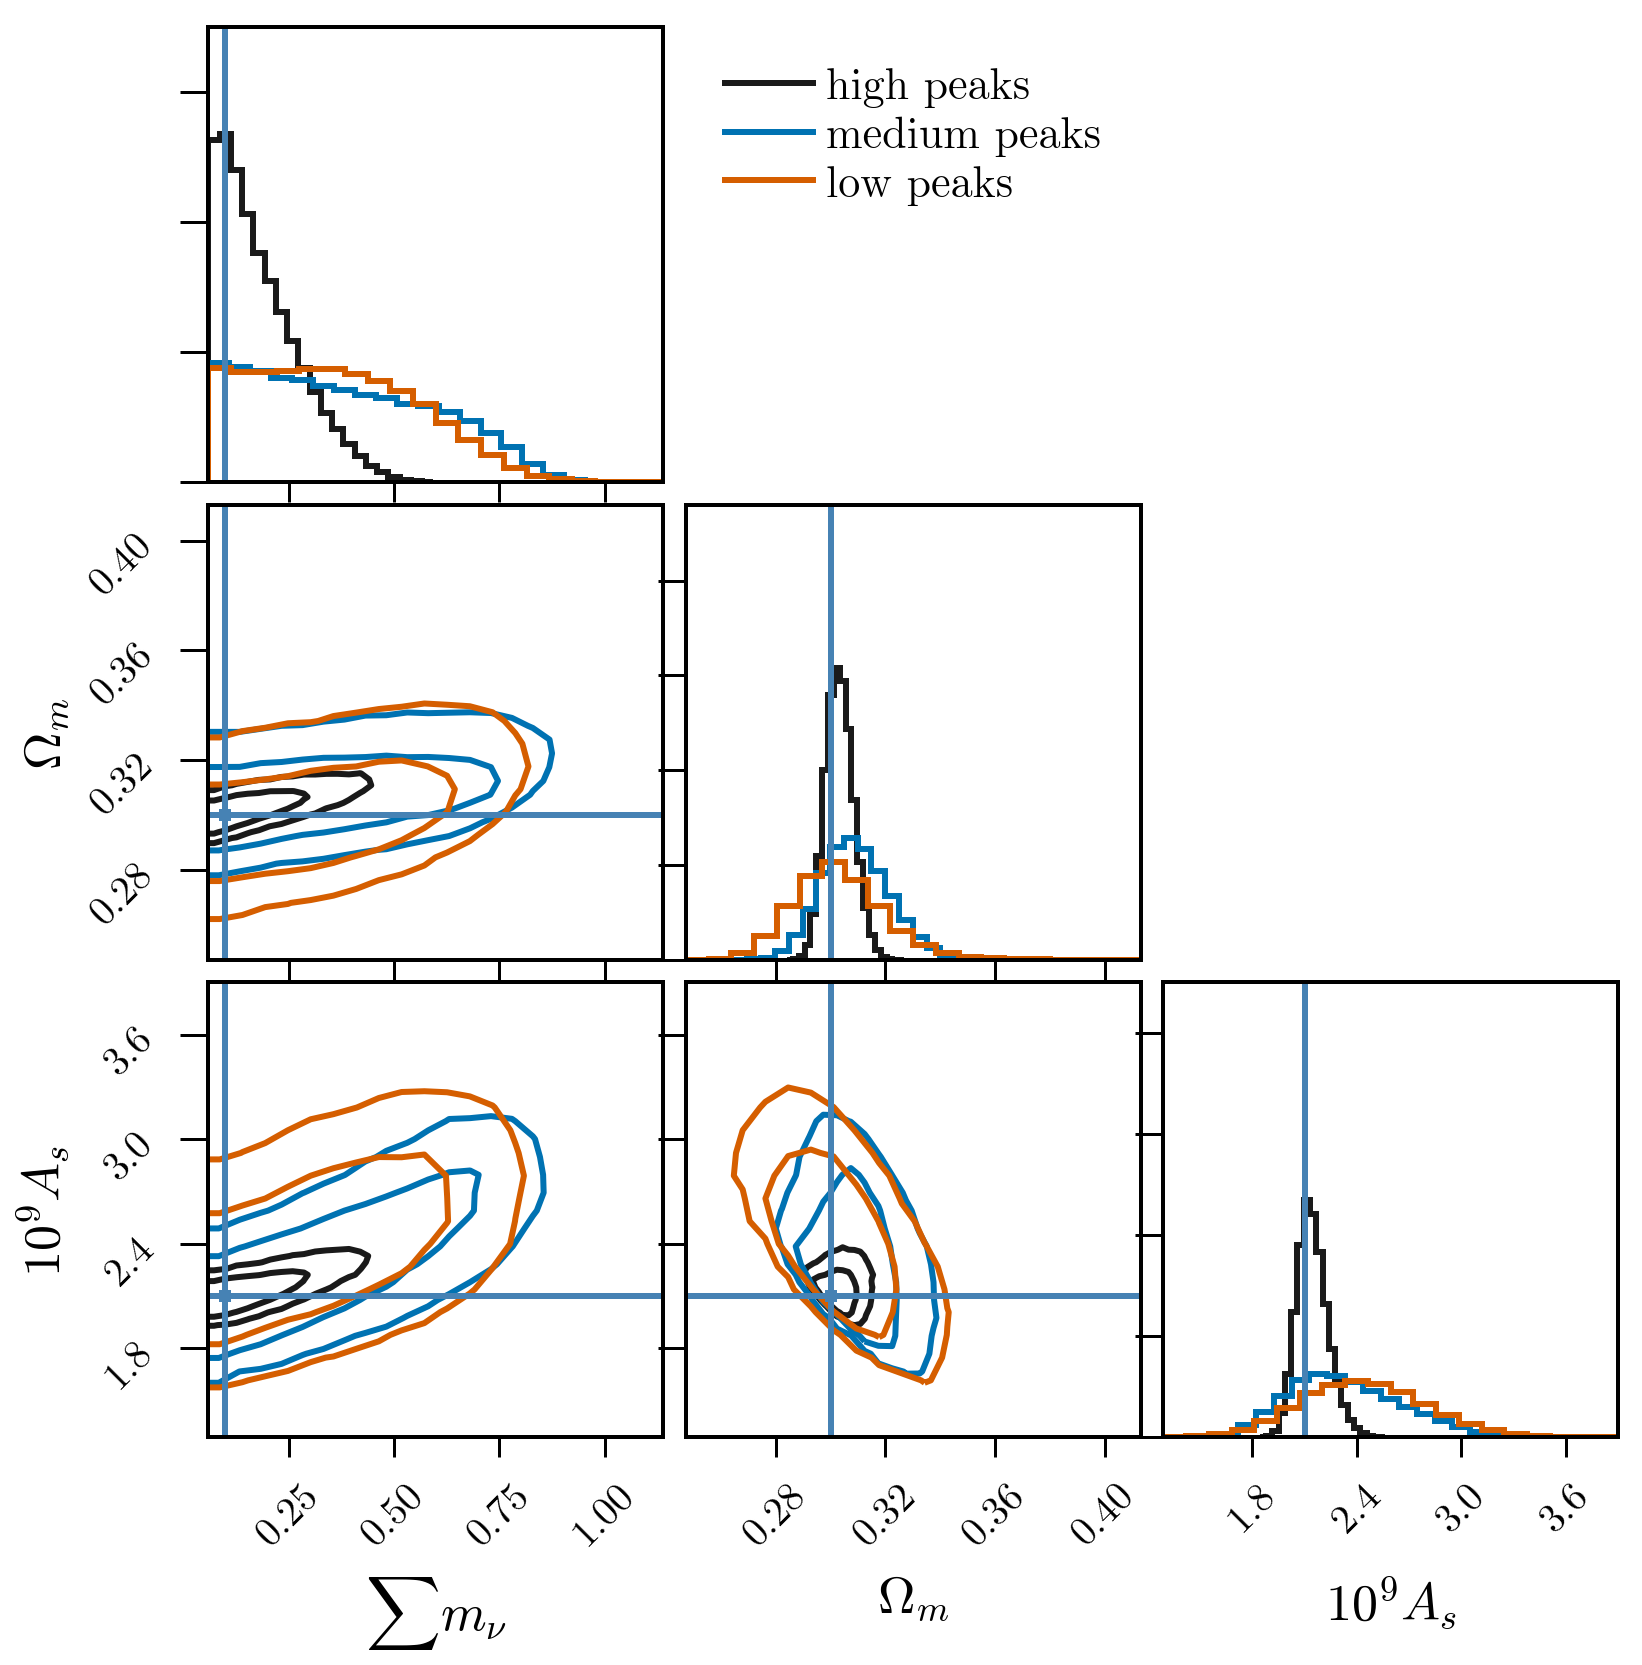

In [11]:
fig, axes = plt.subplots(3,3, figsize=(12,12))

chain = ascii.read("chains/5z_Peaks_high_1060702.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[0])

chain = ascii.read("chains/5z_Peaks_med_1060700.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])

chain = ascii.read("chains/5z_Peaks_low_1060699.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    color=default_color_list[3])

axes[0,1].plot([],[],color=default_color_list[0], label=r'high peaks')
axes[0,1].plot([],[],color=default_color_list[1], label=r'medium peaks')
axes[0,1].plot([],[],color=default_color_list[3], label=r'low peaks')
axes[0,1].legend()

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

fig.savefig('figures/peaks_bin_comparison.pdf')